Analyze the dataset for CECS551_dataset_01

A. Identify the key variables for the model using correlation plots, heatmaps, histograms, feature importance (SHAP).

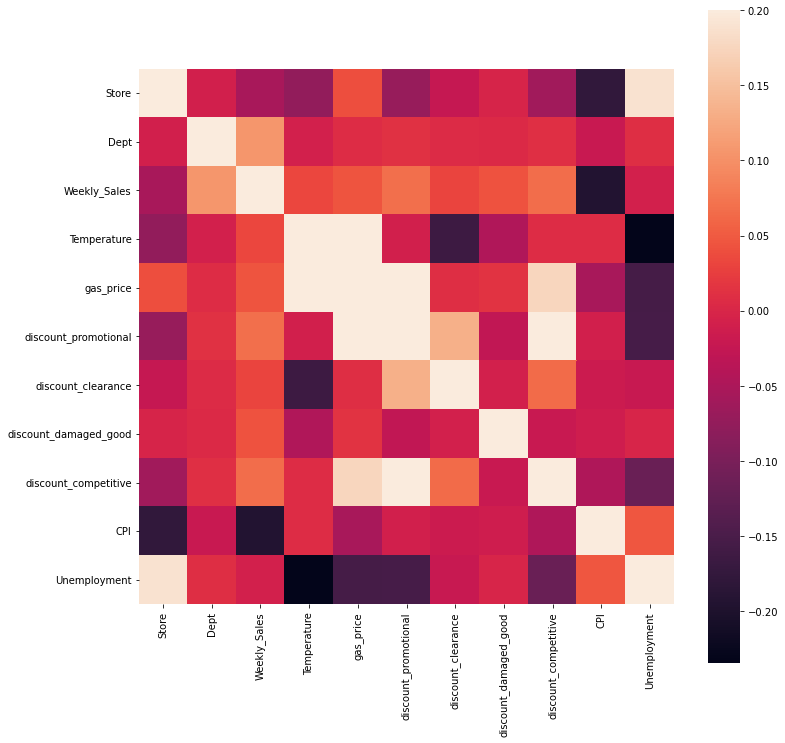

In [ ]:
# pip install shap
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

data_train = pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/train.csv')

excel_file_list = ['store_01','store_02','store_03','store_04','store_05','store_06','store_07','store_08','store_09','store_10']
url = 'https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main'

data_store = pd.DataFrame()
for excel_files in excel_file_list:
  df = pd.read_csv(url+"/"+excel_files+'.csv')
  # df.to_excel (r'./'+excel_files+'.xlsx', index = None, header=True)
  # df = pd.read_excel("./"+excel_files+'.xlsx')
  data_store = data_store.append(df)

data_store['Date'] = pd.to_datetime(data_store['Date'])
data_train['Date'] = pd.to_datetime(data_train['Date'])

data_train.fillna(0, inplace=True)
data_store.fillna(0, inplace=True)

data = pd.merge(data_train, data_store, on=["Store", "Date", "IsHoliday"])

# Building correlation heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.200, square=True);


In [ ]:
data.IsHoliday = data.IsHoliday.replace({True: 1, False: 0})
data.fillna(0, inplace=True)

# Prepare X and Y
X = pd.get_dummies(data)
y = data['Weekly_Sales']
X.drop(['Weekly_Sales', 'Date', 'Dept', 'Store'], inplace=True, axis=1)


sc = StandardScaler()
scaled_X = sc.fit_transform(X)

model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)

# Fit the Model
model.fit(scaled_X, y)

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(scaled_X, check_additivity=False)

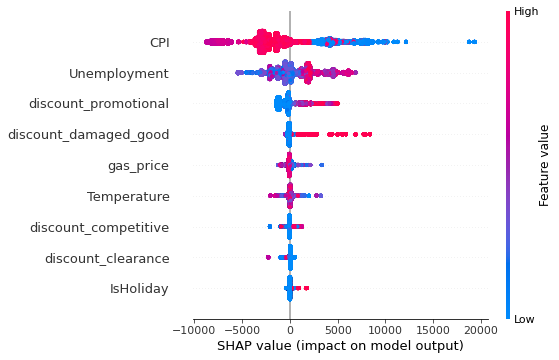

In [ ]:
# Build Beeswarm graph
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

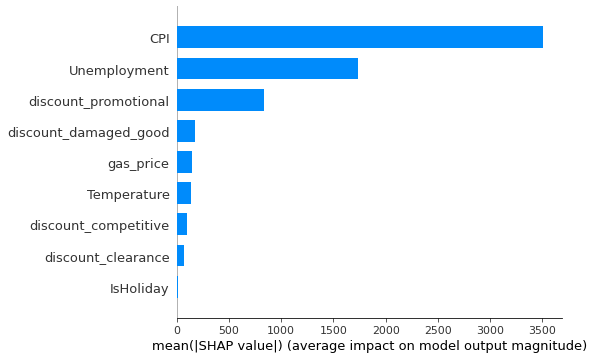

In [ ]:
# Build bar plot
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

B.	For the first 10 stores visualize the weekly and monthly sales patterns for top 35% of the product sales and department sales. 

B.1.	Identify the best department and product “type” across the first ten stores.


In [ ]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month

# Top 35% Weekly Department Sales across first 10 stores

df = pd.DataFrame({'Average_weekly_sales_per_store_per_year' : data.groupby(['Store', 'Dept', 'year'])['Weekly_Sales'].mean()}).reset_index()
df1 = pd.DataFrame({'Average_Weekly_Sales' : df.groupby(['Dept', 'year'])['Average_weekly_sales_per_store_per_year'].mean()}).reset_index()

sorted_data = df1.sort_values(by=['Average_Weekly_Sales'], ascending=False)

top_dept=sorted_data.head(int(len(sorted_data)*(35/100)))

fig = px.scatter_3d(top_dept, x='year', y='Dept', z='Average_Weekly_Sales',
              color='Dept', size='Dept', size_max=30, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
# Top 35% Monthly Department Sales across first 10 stores
df = pd.DataFrame({'Total_monthly_sales_per_store_per_year' : data.groupby(['Store', 'Dept', 'month','year'])['Weekly_Sales'].sum()}).reset_index()
df1 = pd.DataFrame({'Average_monthly_sales_per_store_per_year' : df.groupby(['Store', 'Dept','year'])['Total_monthly_sales_per_store_per_year'].mean()}).reset_index()
df2 = pd.DataFrame({'Average_monthly_sales' : df1.groupby(['Dept','year'])['Average_monthly_sales_per_store_per_year'].mean()}).reset_index()

sorted_data = df2.sort_values(by=['Average_monthly_sales'], ascending=False)

top_dept=sorted_data.head(int(len(sorted_data)*(35/100)))

fig = px.scatter_3d(top_dept, x='year', y='Dept', z='Average_monthly_sales',
              color='Dept', size='Dept', size_max=30, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

C.	Investigate the relationship between weekly sales over CPI and unemployment for the first 10 stores. You can explore the what-if scenarios while writing the report.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
store_01=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_01.csv')
store_02=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_02.csv')
store_03=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_03.csv')
store_04=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_04.csv')
store_05=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_05.csv')
store_06=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_06.csv')
store_07=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_07.csv')
store_08=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_08.csv')
store_09=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_09.csv')
store_10=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_10.csv')
store_11_35=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_11_35.csv')
train = pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/train.csv?raw=true')
store_type_data = pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/stores.csv')

In [ ]:
store_10["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_09["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_08["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_07["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_06["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_05["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_04["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_03["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_02["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_01["IsHoliday"].replace({False: 0, True: 1}, inplace=True)
store_11_35["IsHoliday"].replace({False: 0, True: 1}, inplace=True)

In [ ]:
store_01['discount_promotional'] = store_01['discount_promotional'].replace(np.NaN, 0)
store_01['discount_clearance'] = store_01['discount_clearance'].replace(np.NaN, 0)
store_01['discount_damaged_good'] = store_01['discount_damaged_good'].replace(np.NaN, 0)
store_01['discount_competitive'] = store_01['discount_competitive'].replace(np.NaN, 0)
store_01['CPI'] = store_01['CPI'].replace(np.NaN, 0)
store_01['Unemployment'] = store_01['Unemployment'].replace(np.NaN, 0) 

store_02['discount_promotional'] = store_02['discount_promotional'].replace(np.NaN, 0)
store_02['discount_clearance'] = store_02['discount_clearance'].replace(np.NaN, 0)
store_02['discount_damaged_good'] = store_02['discount_damaged_good'].replace(np.NaN, 0)
store_02['discount_competitive'] = store_02['discount_competitive'].replace(np.NaN, 0)
store_02['CPI'] = store_02['CPI'].replace(np.NaN, 0)
store_02['Unemployment'] = store_02['Unemployment'].replace(np.NaN, 0)

store_03['discount_promotional'] = store_03['discount_promotional'].replace(np.NaN, 0)
store_03['discount_clearance'] = store_03['discount_clearance'].replace(np.NaN, 0)
store_03['discount_damaged_good'] = store_03['discount_damaged_good'].replace(np.NaN, 0)
store_03['discount_competitive'] = store_03['discount_competitive'].replace(np.NaN, 0)
store_03['CPI'] = store_03['CPI'].replace(np.NaN, 0)
store_03['Unemployment'] = store_03['Unemployment'].replace(np.NaN, 0)

store_04['discount_promotional'] = store_04['discount_promotional'].replace(np.NaN, 0)
store_04['discount_clearance'] = store_04['discount_clearance'].replace(np.NaN, 0)
store_04['discount_damaged_good'] = store_04['discount_damaged_good'].replace(np.NaN, 0)
store_04['discount_competitive'] = store_04['discount_competitive'].replace(np.NaN, 0)
store_04['CPI'] = store_04['CPI'].replace(np.NaN, 0)
store_04['Unemployment'] = store_04['Unemployment'].replace(np.NaN, 0)

store_05['discount_promotional'] = store_05['discount_promotional'].replace(np.NaN, 0)
store_05['discount_clearance'] = store_05['discount_clearance'].replace(np.NaN, 0)
store_05['discount_damaged_good'] = store_05['discount_damaged_good'].replace(np.NaN, 0)
store_05['discount_competitive'] = store_05['discount_competitive'].replace(np.NaN, 0)
store_05['CPI'] = store_05['CPI'].replace(np.NaN, 0)
store_05['Unemployment'] = store_05['Unemployment'].replace(np.NaN, 0)

store_06['discount_promotional'] = store_06['discount_promotional'].replace(np.NaN, 0)
store_06['discount_clearance'] = store_06['discount_clearance'].replace(np.NaN, 0)
store_06['discount_damaged_good'] = store_06['discount_damaged_good'].replace(np.NaN, 0)
store_06['discount_competitive'] = store_06['discount_competitive'].replace(np.NaN, 0)
store_06['CPI'] = store_06['CPI'].replace(np.NaN, 0)
store_06['Unemployment'] = store_06['Unemployment'].replace(np.NaN, 0)

store_07['discount_promotional'] = store_07['discount_promotional'].replace(np.NaN, 0)
store_07['discount_clearance'] = store_07['discount_clearance'].replace(np.NaN, 0)
store_07['discount_damaged_good'] = store_07['discount_damaged_good'].replace(np.NaN, 0)
store_07['discount_competitive'] = store_07['discount_competitive'].replace(np.NaN, 0)
store_07['CPI'] = store_07['CPI'].replace(np.NaN, 0)
store_07['Unemployment'] = store_07['Unemployment'].replace(np.NaN, 0)

store_08['discount_promotional'] = store_08['discount_promotional'].replace(np.NaN, 0)
store_08['discount_clearance'] = store_08['discount_clearance'].replace(np.NaN, 0)
store_08['discount_damaged_good'] = store_08['discount_damaged_good'].replace(np.NaN, 0)
store_08['discount_competitive'] = store_08['discount_competitive'].replace(np.NaN, 0)
store_08['CPI'] = store_08['CPI'].replace(np.NaN, 0)
store_08['Unemployment'] = store_08['Unemployment'].replace(np.NaN, 0)

store_09['discount_promotional'] = store_09['discount_promotional'].replace(np.NaN, 0)
store_09['discount_clearance'] = store_09['discount_clearance'].replace(np.NaN, 0)
store_09['discount_damaged_good'] = store_09['discount_damaged_good'].replace(np.NaN, 0)
store_09['discount_competitive'] = store_09['discount_competitive'].replace(np.NaN, 0)
store_09['CPI'] = store_09['CPI'].replace(np.NaN, 0)
store_09['Unemployment'] = store_09['Unemployment'].replace(np.NaN, 0)

store_10['discount_promotional'] = store_10['discount_promotional'].replace(np.NaN, 0)
store_10['discount_clearance'] = store_10['discount_clearance'].replace(np.NaN, 0)
store_10['discount_damaged_good'] = store_10['discount_damaged_good'].replace(np.NaN, 0)
store_10['discount_competitive'] = store_10['discount_competitive'].replace(np.NaN, 0)
store_10['CPI'] = store_10['CPI'].replace(np.NaN, 0)
store_10['Unemployment'] = store_10['Unemployment'].replace(np.NaN, 0)

store_11_35['discount_promotional'] = store_11_35['discount_promotional'].replace(np.NaN, 0)
store_11_35['discount_clearance'] = store_11_35['discount_clearance'].replace(np.NaN, 0)
store_11_35['discount_damaged_good'] = store_11_35['discount_damaged_good'].replace(np.NaN, 0)
store_11_35['discount_competitive'] = store_11_35['discount_competitive'].replace(np.NaN, 0)
store_11_35['CPI'] = store_11_35['CPI'].replace(np.NaN, 0)
store_11_35['Unemployment'] = store_11_35['Unemployment'].replace(np.NaN, 0)

In [ ]:
WeeklySales_Avg = train.groupby(['Store', 'Date'])['Weekly_Sales'].mean().reset_index()

In [ ]:
Weekly_Sales_Data= WeeklySales_Avg.head(1430)

In [ ]:
Weekly_Sales_Data

,Store,Date,Weekly_Sales
0,1,2010-02-05,22516.313699
1,1,2010-02-12,22804.964444
2,1,2010-02-19,22081.755753
3,1,2010-02-26,19579.549861
4,1,2010-03-05,21298.721644
...,...,...,...
1425,10,2012-09-28,23539.755694
1426,10,2012-10-05,24095.498356
1427,10,2012-10-12,23477.933014
1428,10,2012-10-19,24094.928056


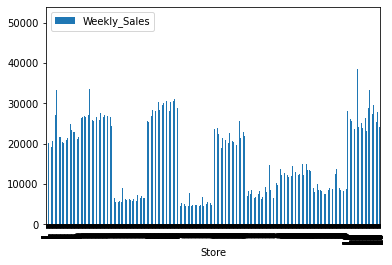

In [ ]:
WeeklySales_Avg[:1430].plot(x = 'Store', y = 'Weekly_Sales', kind = 'bar')

#4th store has high weekly sales avg
#5th store has least

In [ ]:
store_10['Store'].unique()

array([10])

In [ ]:
store_10_cpi = store_10.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_09_cpi = store_09.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_08_cpi = store_08.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_07_cpi = store_07.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_06_cpi = store_06.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_05_cpi = store_05.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_04_cpi = store_04.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_03_cpi = store_03.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_02_cpi = store_02.groupby(['Store', 'Date'])['CPI'].mean().reset_index()
store_01_cpi = store_01.groupby(['Store', 'Date'])['CPI'].mean().reset_index()

In [ ]:
store_01_Unemployment = store_01.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_02_Unemployment = store_02.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_03_Unemployment = store_03.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_04_Unemployment = store_04.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_05_Unemployment = store_05.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_06_Unemployment = store_06.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_07_Unemployment = store_07.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_08_Unemployment = store_08.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_09_Unemployment = store_09.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()
store_10_Unemployment = store_10.groupby(['Store', 'Date'])['Unemployment'].mean().reset_index()

In [ ]:
Weekly_Sales_Data = Weekly_Sales_Data.astype({'Date':'datetime64[ns]'})
Weekly_Sales_Data

,Store,Date,Weekly_Sales
0,1,2010-02-05,22516.313699
1,1,2010-02-12,22804.964444
2,1,2010-02-19,22081.755753
3,1,2010-02-26,19579.549861
4,1,2010-03-05,21298.721644
...,...,...,...
1425,10,2012-09-28,23539.755694
1426,10,2012-10-05,24095.498356
1427,10,2012-10-12,23477.933014
1428,10,2012-10-19,24094.928056


In [ ]:
CPI_Avg_Data = pd.concat([store_01_cpi, store_02_cpi, store_03_cpi, store_04_cpi, store_05_cpi, store_06_cpi, store_07_cpi, store_08_cpi, store_09_cpi, store_10_cpi])
CPI_Avg_Data.head(1430)

,Store,Date,CPI
0,1,1/11/2013,224.201552
1,1,1/13/2012,219.892526
2,1,1/14/2011,227.757938
3,1,1/18/2013,224.235813
4,1,1/20/2012,219.985689
...,...,...,...
151,8,10/22/2010,215.224800
152,8,10/26/2012,227.036936
153,8,10/28/2011,221.127803
154,8,10/29/2010,215.273900


In [ ]:
CPI_Avg_Data = CPI_Avg_Data.astype({'Date':'datetime64[ns]'})
CPI_Avg_Data

,Store,Date,CPI
0,1,2013-01-11,224.201552
1,1,2012-01-13,219.892526
2,1,2011-01-14,227.757938
3,1,2013-01-18,224.235813
4,1,2012-01-20,219.985689
...,...,...,...
177,10,2011-12-23,129.984548
178,10,2010-12-24,126.983581
179,10,2012-12-28,131.747000
180,10,2011-12-30,130.071032


In [ ]:
Weeklysales_CPI_data = pd.merge(Weekly_Sales_Data, CPI_Avg_Data)
Weeklysales_CPI_data

,Store,Date,Weekly_Sales,CPI
0,1,2010-02-05,22516.313699,223.659114
1,1,2010-02-12,22804.964444,223.753643
2,1,2010-02-19,22081.755753,223.917015
3,1,2010-02-26,19579.549861,224.132020
4,1,2010-03-05,21298.721644,224.347025
...,...,...,...,...
1378,10,2012-09-28,23539.755694,131.043000
1379,10,2012-10-05,24095.498356,131.075667
1380,10,2012-10-12,23477.933014,131.108333
1381,10,2012-10-19,24094.928056,131.149968


In [ ]:
CPI_Avg_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 181
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Store   1820 non-null   int64  
 1   Date    1820 non-null   object 
 2   CPI     1820 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 56.9+ KB


In [ ]:
Weekly_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1430 non-null   int64         
 1   Date          1430 non-null   datetime64[ns]
 2   Weekly_Sales  1430 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 33.6 KB


In [ ]:
Weeklysales_CPI_data = pd.merge(Weekly_Sales_Data, CPI_Avg_Data)


In [ ]:
Unemployment_Avg_Data = pd.concat([store_01_Unemployment, store_02_Unemployment, store_03_Unemployment, store_04_Unemployment, store_05_Unemployment, store_06_Unemployment, store_07_Unemployment, store_08_Unemployment, store_09_Unemployment, store_10_Unemployment])


In [ ]:
Unemployment_Avg_Data = Unemployment_Avg_Data.astype({'Date':'datetime64[ns]'})
Unemployment_Avg_Data

,Store,Date,Unemployment
0,1,2013-01-11,7.852
1,1,2012-01-13,8.099
2,1,2011-01-14,6.108
3,1,2013-01-18,7.852
4,1,2012-01-20,8.099
...,...,...,...
177,10,2011-12-23,7.874
178,10,2010-12-24,9.003
179,10,2012-12-28,6.943
180,10,2011-12-30,7.874


In [ ]:
Weeklysales_Unemployment_data = pd.merge(Weekly_Sales_Data, Unemployment_Avg_Data)
Weeklysales_Unemployment_data

,Store,Date,Weekly_Sales,Unemployment
0,1,2010-02-05,22516.313699,6.833
1,1,2010-02-12,22804.964444,6.833
2,1,2010-02-19,22081.755753,6.833
3,1,2010-02-26,19579.549861,6.833
4,1,2010-03-05,21298.721644,6.833
...,...,...,...,...
1378,10,2012-09-28,23539.755694,7.170
1379,10,2012-10-05,24095.498356,6.943
1380,10,2012-10-12,23477.933014,6.943
1381,10,2012-10-19,24094.928056,6.943


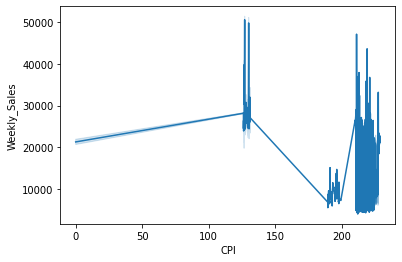

In [ ]:
sns.lineplot(data=Weeklysales_CPI_data, x='CPI', y='Weekly_Sales',palette="Set2")

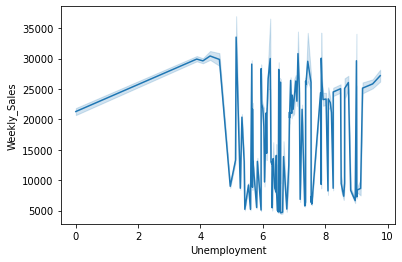

In [ ]:
sns.lineplot(data=Weeklysales_Unemployment_data, x='Unemployment', y='Weekly_Sales',palette="Set2")

D.	Investigate the impact of various types of discounts, for example, discount promotional, discount clearance, discount damaged good, discount competitive and discount employee on the overall sales.

D.1.	Which type of discount is helpful in increasing the sales? Consider top 30% of the best performing stores (sales per 1000 square feet).

D.2.	Does the observed behavior hold true for all the stores? Consider bottom 30% of the least performing store (sales per 1000 square feet).


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_01.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_02.csv')
df3=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_03.csv')
df4=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_04.csv')
df5=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_05.csv')
df6=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_06.csv')
df7=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_07.csv')
df8=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_08.csv')
df9=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_09.csv')
df10=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_10.csv')
df11=pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/store_11_35.csv')
train = pd.read_csv('https://raw.githubusercontent.com/harshagithubpro/My_Advanced_AI/main/train.csv')


### Just for analysis: Impact of various discount for all Stores

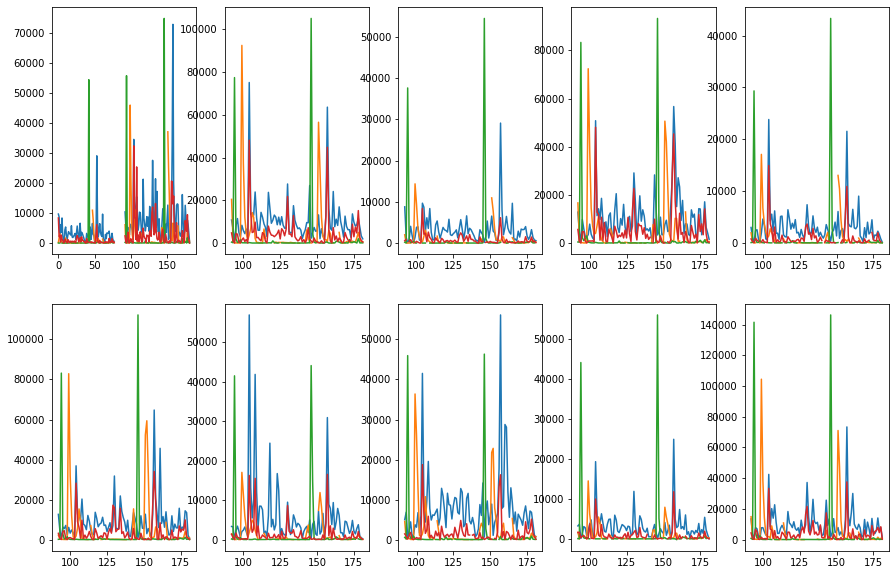

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,5,1)
plt.plot(df1["discount_promotional"], label = "discount_promotional")
plt.plot(df1["discount_clearance"], label = "discount_clearance")
plt.plot(df1["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df1["discount_competitive"], label = "discount_competitive")


plt.subplot(2,5,2)
plt.plot(df2["discount_promotional"], label = "discount_promotional")
plt.plot(df2["discount_clearance"], label = "discount_clearance")
plt.plot(df2["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df2["discount_competitive"], label = "discount_competitive")


plt.subplot(2,5,3)
plt.plot(df3["discount_promotional"], label = "discount_promotional")
plt.plot(df3["discount_clearance"], label = "discount_clearance")
plt.plot(df3["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df3["discount_competitive"], label = "discount_competitive")

plt.subplot(2,5,4)
plt.plot(df4["discount_promotional"], label = "discount_promotional")
plt.plot(df4["discount_clearance"], label = "discount_clearance")
plt.plot(df4["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df4["discount_competitive"], label = "discount_competitive")

plt.subplot(2,5,5)
plt.plot(df5["discount_promotional"], label = "discount_promotional")
plt.plot(df5["discount_clearance"], label = "discount_clearance")
plt.plot(df5["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df5["discount_competitive"], label = "discount_competitive")

plt.subplot(2,5,6)
plt.plot(df6["discount_promotional"], label = "discount_promotional")
plt.plot(df6["discount_clearance"], label = "discount_clearance")
plt.plot(df6["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df6["discount_competitive"], label = "discount_competitive")


plt.subplot(2,5,7)
plt.plot(df7["discount_promotional"], label = "discount_promotional")
plt.plot(df7["discount_clearance"], label = "discount_clearance")
plt.plot(df7["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df7["discount_competitive"], label = "discount_competitive")
# plt.legend()

plt.subplot(2,5,8)
plt.plot(df8["discount_promotional"], label = "discount_promotional")
plt.plot(df8["discount_clearance"], label = "discount_clearance")
plt.plot(df8["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df8["discount_competitive"], label = "discount_competitive")

plt.subplot(2,5,9)
plt.plot(df9["discount_promotional"], label = "discount_promotional")
plt.plot(df9["discount_clearance"], label = "discount_clearance")
plt.plot(df9["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df9["discount_competitive"], label = "discount_competitive")

plt.subplot(2,5,10)
plt.plot(df10["discount_promotional"], label = "discount_promotional")
plt.plot(df10["discount_clearance"], label = "discount_clearance")
plt.plot(df10["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(df10["discount_competitive"], label = "discount_competitive")

plt.show()


### We can see from the graphs that even if there are some high spikes for discount_damaged_good Discount_promotional plays an important role in weekly sales as is it even throughout.

### Calculating mean of weekly sales of all 36 stores to figure out which is the best and worst performing store

In [ ]:
list1=[]
for i in range(1,36):
    store=train[(train['Store']== i) & (train['Dept']==1)]
    x=store['Weekly_Sales'].mean()
    list1.append((int(x),i))
print(list1)
print(max(list1),min(list1))

[(22513, 1), (30777, 2), (7328, 3), (36979, 4), (9774, 5), (23867, 6), (9542, 7), (14789, 8), (11846, 9), (39925, 10), (18860, 11), (17330, 12), (47020, 13), (30611, 14), (13845, 15), (11352, 16), (22801, 17), (21988, 18), (21504, 19), (40545, 20), (14950, 21), (21493, 22), (33186, 23), (18859, 24), (20145, 25), (19402, 26), (30437, 27), (20180, 28), (15504, 29), (9788, 30), (17356, 31), (22852, 32), (2379, 33), (19947, 34), (17082, 35)]
(47020, 13) (2379, 33)


### Analysis: From above values we can see that Store13 performed best and Store33 performed worst

### Now for this 2 particular store(Store13 and Store33) we will take top 30% and will find the pattern

### Store13

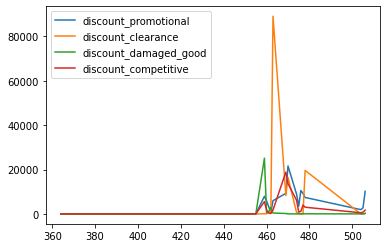

In [ ]:
# We create store13 from train dataset
store13=train[(train['Store']== 13) & (train['Dept']==1)]
# We create seperate dataframe for 13 as its merged in store_11_35 dataset 
df13=df11[df11['Store']== 13]
# We will drop rows range(143-182) becasue those values doesnot have weekly sales right now as they are in testing dataset
df13=df13.drop(range(507,546),axis=0)
# we will take weekly sales colmn from train dataset an merge it into individual store dataset
Weekly_Sales=store13['Weekly_Sales']
# Merge into df13
df13["Weekly_Sales"]=store13['Weekly_Sales'].values
# Find top 30%
top30=df13.nlargest(math.floor(len(store13)*0.30),'Weekly_Sales')
# Sort the df to get all index in sequence
top30=top30.sort_index()
# Fill all Nan by 0
top30['discount_promotional'].fillna(value=0, inplace=True)
top30['discount_clearance'].fillna(value=0, inplace=True)
top30['discount_damaged_good'].fillna(value=0, inplace=True)
top30['discount_competitive'].fillna(value=0, inplace=True)
# Plot
plt.plot(top30["discount_promotional"], label = "discount_promotional")
plt.plot(top30["discount_clearance"], label = "discount_clearance")
plt.plot(top30["discount_damaged_good"],  label = "discount_damaged_good")
plt.plot(top30["discount_competitive"], label = "discount_competitive")
plt.legend()
plt.show()

### From the mean and the plot we can see that discount_clearance impacts the most.

### Store33

In [ ]:
# We create store33 from train dataset
store33=store33=train[(train['Store']== 33) & (train['Dept']==1)]
# We create seperate dataframe for 33 as its merged in store_11_35 dataset
df33=df11[df11['Store']== 33]
# First we will take weekly sales colm from train dataset an merge it into individual store dataset
Weekly_Sales=store33['Weekly_Sales']
# We will drop rows(143-182) becasue those values doesnot have weekly sales right now as they r in testing dataset
df33 = df33.drop(range(4147,4186),axis=0)
# Merge into df10
df33["Weekly_Sales"]=store33['Weekly_Sales'].values
# Find bottom 30%
bottom30=df33.nsmallest(math.floor(len(store33)*0.30),'Weekly_Sales')
# Sort the df to get all index in sequence
bottom30=bottom30.sort_index()
# Check if Nan exist
bottom30.isnull().sum()

Store                     0
Date                      0
IsHoliday                 0
Temperature               0
gas_price                 0
discount_promotional     42
discount_clearance       42
discount_damaged_good    42
discount_competitive     42
CPI                       0
Unemployment              0
Weekly_Sales              0
dtype: int64

### Analysis: As we can see: All the values for discounts are Nan so we cannot tell anything from this dataset.

## Final Analysis: We can see that while taking the data of individual store Discount_promotional played an important role in increasing weeklySales while if we take only top 30% from the best performing store Discount_clearance plays an important role in increasing the weeklySales. So we can say that the dataset doesnot follow same pattern.

E. Identify the “type” of products which are highly impacted by external factors: “temperature”, “gas price”, and “holiday”. Is there any correlation between overall sales and holiday?

In [ ]:
store1_dept = train.loc[train['Store'] == 1]
store1_dept.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False
10243,1,99,2012-10-12,80.00,False


In [ ]:
store1_dept = store1_dept.astype({'Date':'datetime64[ns]'})
store1_dept

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False


In [ ]:
store1_dept.tail(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday
10243,1,99,2012-10-12,80.0,False


In [ ]:
store_01 = store_01.astype({'Date':'datetime64[ns]'})


In [ ]:
df2 = pd.merge( store_01, store1_dept, on=['Date','Store'])

In [ ]:
df2.head(5)

,Store,Date,IsHoliday_x,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,0,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833,1,24924.50,False
1,1,2010-02-05,0,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833,2,50605.27,False
2,1,2010-02-05,0,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833,3,13740.12,False
3,1,2010-02-05,0,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833,4,39954.04,False
4,1,2010-02-05,0,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833,5,32229.38,False


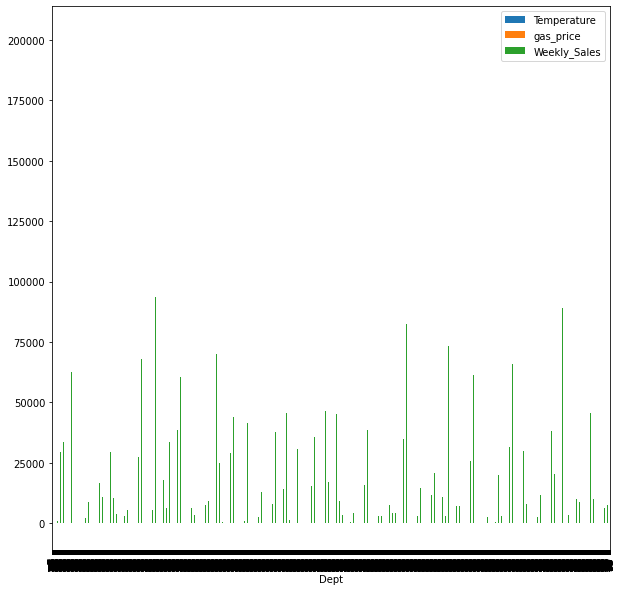

In [ ]:
df2.plot(x="Dept", y=["Temperature","gas_price", "Weekly_Sales"],
        kind="bar", figsize=(10,10))

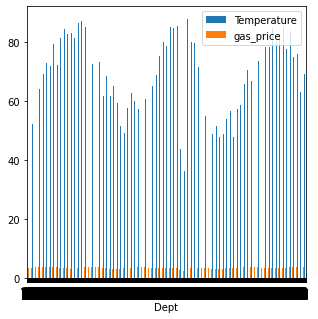

In [ ]:
df2.plot(x="Dept", y=["Temperature","gas_price"],
        kind="bar", figsize=(5,5))

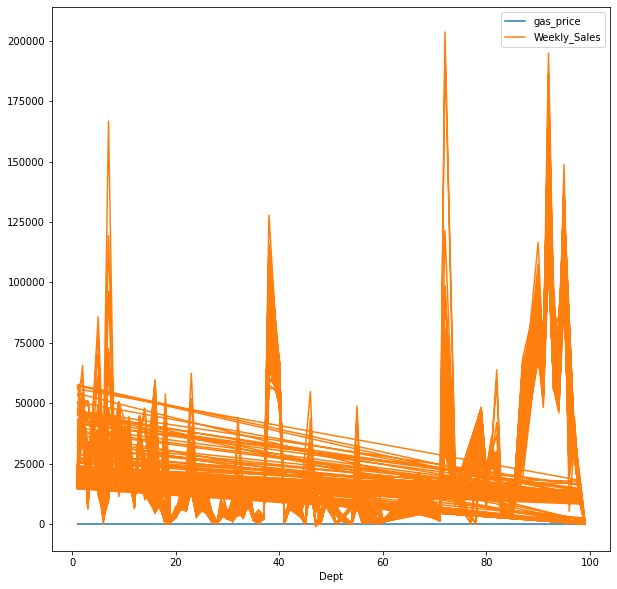

In [ ]:
df2.plot(x="Dept", y=["gas_price","Weekly_Sales"],
        kind="line", figsize=(10, 10))

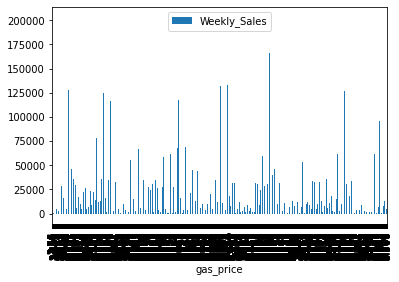

In [ ]:
df2.plot(x = 'gas_price', y = 'Weekly_Sales', kind = 'bar')

In [ ]:
df2["IsHoliday_x"].replace({False: 0, True: 1}, inplace=True)
df2["IsHoliday_y"].replace({False: 0, True: 1}, inplace=True)

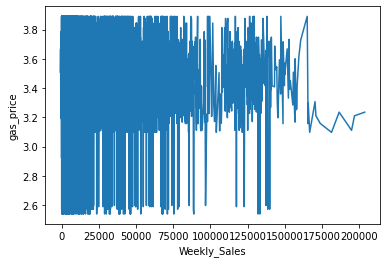

In [ ]:
sns.lineplot(data=df2, x='Weekly_Sales', y='gas_price')

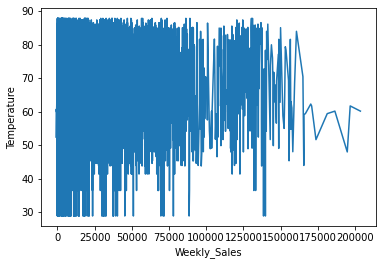

In [ ]:
sns.lineplot(data=df2, x='Weekly_Sales', y='Temperature')

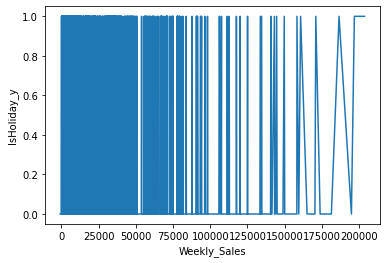

In [ ]:
sns.lineplot(data=df2, x='Weekly_Sales', y='IsHoliday_y')